# Week 2: Implementing Callbacks in TensorFlow using the MNIST Dataset

In the course you learned how to do classification using Fashion MNIST, a data set containing items of clothing. There's another, similar dataset called MNIST which has items of handwriting -- the digits 0 through 9.

Write an MNIST classifier that trains to 99% accuracy or above, and does it without a fixed number of epochs -- i.e. you should stop training once you reach that level of accuracy. In the lecture you saw how this was done for the loss but here you will be using accuracy instead.

Some notes:
1. Given the architecture of the net, it should succeed in less than 10 epochs.
2. When it reaches 99% or greater it should print out the string "Reached 99% accuracy so cancelling training!" and stop training.
3. If you add any additional variables, make sure you use the same names as the ones used in the class. This is important for the function signatures (the parameters and names) of the callbacks.

In [2]:
import os
import tensorflow as tf
from tensorflow import keras

Begin by loading the data. A couple of things to notice:

- The file `mnist.npz` is already included in the current workspace under the `data` directory. By default the `load_data` from Keras accepts a path relative to `~/.keras/datasets` but in this case it is stored somewhere else, as a result of this, you need to specify the full path.

- `load_data` returns the train and test sets in the form of the tuples `(x_train, y_train), (x_test, y_test)` but in this exercise you will be needing only the train set so you can ignore the second tuple.

In [3]:
# Load the data

# Get current working directory
current_dir = os.getcwd()

# Append data/mnist.npz to the previous path to get the full path
data_path = os.path.join(current_dir, "data/mnist.npz")

# Discard test set
(x_train, y_train), _ = tf.keras.datasets.mnist.load_data(path=data_path)
        
# Normalize pixel values
x_train = x_train / 255.0

Now take a look at the shape of the training data:

In [4]:
data_shape = x_train.shape

print(f"There are {data_shape[0]} examples with shape ({data_shape[1]}, {data_shape[2]})")

There are 60000 examples with shape (28, 28)


Now it is time to create your own custom callback. For this complete the `myCallback` class and the `on_epoch_end` method in the cell below. If you need some guidance on how to proceed, check out this [link](https://www.tensorflow.org/guide/keras/custom_callback).

In [5]:
# GRADED CLASS: myCallback
### START CODE HERE

# Remember to inherit from the correct class
class myCallback(tf.keras.callbacks.Callback):
        # Define the correct function signature for on_epoch_end
        def on_epoch_end(self, epoch, logs={}):
            if logs.get('accuracy') is not None and logs.get('accuracy') > 0.99: # @KEEP
                print("\nReached 99% accuracy so cancelling training!") 
                
                # Stop training once the above condition is met
                self.model.stop_training = True

### END CODE HERE




Now that you have defined your callback it is time to complete the `train_mnist` function below:

In [8]:
# GRADED FUNCTION: train_mnist
def train_mnist(x_train, y_train):

    ### START CODE HERE
    
    # Instantiate the callback class
    callbacks = myCallback()
    
    # Define the model, it should have 3 layers:
    # - A Flatten layer that receives inputs with the same shape as the images
    # - A Dense layer with 512 units and ReLU activation function
    # - A Dense layer with 10 units and softmax activation function
    model = tf.keras.models.Sequential([ 
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(512, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax)
    ]) 

    # Compile the model
    model.compile(optimizer='adam', 
                  loss='sparse_categorical_crossentropy', 
                  metrics=['accuracy']) 
    
    # Fit the model for 10 epochs adding the callbacks
    # and save the training history
    history = model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

    ### END CODE HERE

    return history

Call the `train_mnist` passing in the appropiate parameters to get the training history:

In [9]:
hist = train_mnist(x_train, y_train)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2012 - accuracy: 0.9417
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0810 - accuracy: 0.9754
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0514 - accuracy: 0.9839
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0366 - accuracy: 0.9886
Epoch 5/10
1873/1875 [============================>.] - ETA: 0s - loss: 0.0283 - accuracy: 0.9908
Reached 99% accuracy so cancelling training!
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0283 - accuracy: 0.9908


If you see the message `Reached 99% accuracy so cancelling training!` printed out after less than 10 epochs it means your callback worked as expected. 

**Congratulations on finishing this week's assignment!**

You have successfully implemented a callback that gives you more control over the training loop for your model. Nice job!

**Keep it up!**

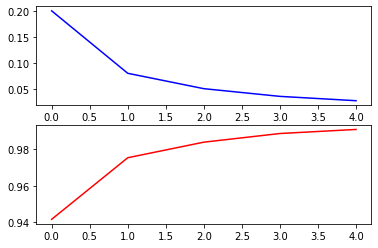

{'loss': [0.20121417939662933, 0.08102934062480927, 0.05143323168158531, 0.036620303988456726, 0.028286444023251534], 'accuracy': [0.9416666626930237, 0.975350022315979, 0.9838666915893555, 0.9886000156402588, 0.9908166527748108]}


In [29]:
import matplotlib.pyplot as plt

plt.subplot(211)
plt.plot(hist.epoch, hist.history["loss"], color="blue")
plt.subplot(212)
plt.plot(hist.epoch, hist.history["accuracy"], color="red")
plt.show()
print(hist.history)